In [1]:
# This script is powered by pyOpenMS, an open-source Python library for mass spectrometry. 
# For further documentation, please see https://pyopenms.readthedocs.io
# Röst HL, Schmitt U, Aebersold R, Malmström L. pyOpenMS: a Python-based interface to the OpenMS mass-spectrometry algorithm library. Proteomics. 2014 Jan;14(1):74-7. doi: 10.1002/pmic.201300246.

In [3]:
import matplotlib.pyplot as plt
import pyopenms as oms
import pandas as pd
import csv
import os
from pyopenms import MSExperiment, MzMLFile
from pyopenms.plotting import plot_spectrum, mirror_plot_spectrum
from tabulate import tabulate
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from pathlib import Path


In [120]:
from itertools import product

# Function to create a custom amino acid sequence with modification
def create_custom_aa_sequence(sequence):
    # Use the AASequence class to parse the peptide sequence
    aa_seq = oms.AASequence.fromString(sequence)
    return aa_seq

# Define a function to generate peptide combinations
def generate_combinations(peptides, min_length, max_length):
    all_combinations = []
    
    # Generate sequences with "[+127.11]" at the first position
    for length in range(min_length, max_length + 1):
        if length == 1:
            all_combinations.append("[+126.11]")  # Only this when length is 1
        else:
            for seq in product(peptides, repeat=length-1):
                all_combinations.append("[+126.11]" + ''.join(seq))

    # Generate sequences using only ["WR", "WN", "WA", "WD"], with lengths 2, 4, 6...
    building_blocks = ["WR", "WN", "WA", "WD"]
    for length in range(2, max_length + 1, 2):  # Only even lengths: 2, 4, 6, ...
        for seq in product(building_blocks, repeat=length // 2):  # Each unit is 2 letters
            all_combinations.append(''.join(seq))
    
    return all_combinations

# Peptides for the sequences starting with "[+127.11]"
peptides = ["W", "D", "N", "R", "A"]  
min_length = 1
max_length = 4  # Adjusted to allow up to length 6

List_Of_Peptides = generate_combinations(peptides, min_length, max_length)

# Print results
print(List_Of_Peptides)

['[+126.11]', '[+126.11]W', '[+126.11]D', '[+126.11]N', '[+126.11]R', '[+126.11]A', '[+126.11]WW', '[+126.11]WD', '[+126.11]WN', '[+126.11]WR', '[+126.11]WA', '[+126.11]DW', '[+126.11]DD', '[+126.11]DN', '[+126.11]DR', '[+126.11]DA', '[+126.11]NW', '[+126.11]ND', '[+126.11]NN', '[+126.11]NR', '[+126.11]NA', '[+126.11]RW', '[+126.11]RD', '[+126.11]RN', '[+126.11]RR', '[+126.11]RA', '[+126.11]AW', '[+126.11]AD', '[+126.11]AN', '[+126.11]AR', '[+126.11]AA', '[+126.11]WWW', '[+126.11]WWD', '[+126.11]WWN', '[+126.11]WWR', '[+126.11]WWA', '[+126.11]WDW', '[+126.11]WDD', '[+126.11]WDN', '[+126.11]WDR', '[+126.11]WDA', '[+126.11]WNW', '[+126.11]WND', '[+126.11]WNN', '[+126.11]WNR', '[+126.11]WNA', '[+126.11]WRW', '[+126.11]WRD', '[+126.11]WRN', '[+126.11]WRR', '[+126.11]WRA', '[+126.11]WAW', '[+126.11]WAD', '[+126.11]WAN', '[+126.11]WAR', '[+126.11]WAA', '[+126.11]DWW', '[+126.11]DWD', '[+126.11]DWN', '[+126.11]DWR', '[+126.11]DWA', '[+126.11]DDW', '[+126.11]DDD', '[+126.11]DDN', '[+126.11]DDR

In [121]:
# Set intensity threshold and create FASTA file using the List of Peptides

MW_toleranz = 0.01
Int_threshold = 10000.0

entries = []

for i in range(len(List_Of_Peptides)):    
    tmp = oms.FASTAEntry()  # one entry in a FASTA file
    tmp.sequence = List_Of_Peptides[i]
    tmp.description = List_Of_Peptides[i]
    tmp.identifier = List_Of_Peptides[i]
    entries.append(tmp)

f = oms.FASTAFile()
f.store("peptides.fasta", entries)

print(len(entries))
for e in entries:
    print(e.identifier, e.sequence)



176
[+126.11] [+126.11]
[+126.11]W [+126.11]W
[+126.11]D [+126.11]D
[+126.11]N [+126.11]N
[+126.11]R [+126.11]R
[+126.11]A [+126.11]A
[+126.11]WW [+126.11]WW
[+126.11]WD [+126.11]WD
[+126.11]WN [+126.11]WN
[+126.11]WR [+126.11]WR
[+126.11]WA [+126.11]WA
[+126.11]DW [+126.11]DW
[+126.11]DD [+126.11]DD
[+126.11]DN [+126.11]DN
[+126.11]DR [+126.11]DR
[+126.11]DA [+126.11]DA
[+126.11]NW [+126.11]NW
[+126.11]ND [+126.11]ND
[+126.11]NN [+126.11]NN
[+126.11]NR [+126.11]NR
[+126.11]NA [+126.11]NA
[+126.11]RW [+126.11]RW
[+126.11]RD [+126.11]RD
[+126.11]RN [+126.11]RN
[+126.11]RR [+126.11]RR
[+126.11]RA [+126.11]RA
[+126.11]AW [+126.11]AW
[+126.11]AD [+126.11]AD
[+126.11]AN [+126.11]AN
[+126.11]AR [+126.11]AR
[+126.11]AA [+126.11]AA
[+126.11]WWW [+126.11]WWW
[+126.11]WWD [+126.11]WWD
[+126.11]WWN [+126.11]WWN
[+126.11]WWR [+126.11]WWR
[+126.11]WWA [+126.11]WWA
[+126.11]WDW [+126.11]WDW
[+126.11]WDD [+126.11]WDD
[+126.11]WDN [+126.11]WDN
[+126.11]WDR [+126.11]WDR
[+126.11]WDA [+126.11]WDA
[+126.

In [122]:
#working directory
# Get the current directory where the script is located
current_directory = r'C:\python-test\MSMS-script-github'

# Specify the file or directory relative to the current directory where the mz.XML files to be analzed are located
relative_path = r'data'

# Combine the current directory with the relative path
directory = os.path.join(current_directory, relative_path)
print(directory)  

C:\python-test\MSMS-script-github\data


In [139]:
# Function to process each mzXML file
def process_file(file_path):
    exp= MSExperiment()
    oms.MzXMLFile().load(file_path, exp)
    spectra = exp.getSpectra()
    out_file_name = f"{os.path.splitext(filename)[0]}_output.csv"
    # Check if the file already exists to decide whether to write the header
    file_exists = os.path.isfile(out_file_name)

    spa = oms.SpectrumAlignment()
    p = spa.getParameters()

    # For low resolution MS data, set tolerance for MS1 calculated and experimental match
    # typically use 0.5 Da tolerance for low resolution data
    #p.setValue("tolerance", 0.5)
    #p.setValue("is_relative_tolerance", "false")

    # For high resolution MS data, set tolerance for MS1 calculated and experimental match
    # typically use tolerance between 8 ppm and 20 ppm for high-resolution data
    p.setValue("tolerance", 10.0) 
    p.setValue("is_relative_tolerance", "true")
    spa.setParameters(p)

    spa_iso = oms.SpectrumAlignment()
    p_iso = spa_iso.getParameters()

    # For low resolution MS data, set tolerance for isotope pattern match
    # typically use 0.5 Da tolerance for low resolution data
    #p.setValue("tolerance", 0.5)
    #p.setValue("is_relative_tolerance", "false")

    # For high resolution MS data, set tolerance for isotope pattern match
    # typically use tolreance between 8 ppm and 20 ppm for high-resolution data
    p_iso.setValue("tolerance", 10.0) # typically use tolerance between 8 ppm and 20 ppm for high-resolution data
    p_iso.setValue("is_relative_tolerance", "true")
    spa_iso.setParameters(p_iso)

    tsg = oms.TheoreticalSpectrumGenerator()

    p2 = oms.Param()
    p2.setValue("add_a_ions", "true")
        # adding n-term ion (in this case, a1 and b1)
    p2.setValue("add_first_prefix_ion", "true")
    p2.setValue("add_precursor_peaks", "true")
        # standard is to add precursor peaks with only the largest charge
    p2.setValue("add_all_precursor_charges", "false")
    p2.setValue("add_losses", "false")
    p2.setValue("add_metainfo", "false")
    tsg.setParameters(p2)



    entries = []

    f = oms.FASTAFile()
    f.load("peptides.fasta", entries)
    print(len(entries))

    # Assuming you have time and intensity data
    time = [spectrum.getRT() for spectrum in exp]
    time_ms1 = []
    print(f'time: {time}')
    
    mass_intensities = [[] for i in range(len(entries))]

    area = [0 for i in range(len(entries))]

    filtered_spectra = [[] for i in range(len(entries))]
    all_spectra = []

    for e in range(len(entries)):
        seq = oms.AASequence.fromString(entries[e].sequence)
        # some mass calculations
        mfull = seq.getMonoWeight()  # weight of M
        mz2 = seq.getMZ(2)  # same as above
        mz1 = seq.getMZ(1)  # same as above
        print("Monoisotopic mass of peptide", entries[e].identifier, " is", mfull)
        print("Monoisotopic m/z of" , entries[e].identifier, "[M+H]+ is", mz1)
        print("Monoisotopic m/z of" , entries[e].identifier, "[M+2H]2+ is", mz2)
      
        # print coarse structure of isotope distribution
        generator = oms.CoarseIsotopePatternGenerator(5) # adjust number for number of calculated isotope pattern
        isotope_distribution = seq.getFormula().getIsotopeDistribution(generator)
    
        iso_spec = oms.MSSpectrum()
        for iso in isotope_distribution.getContainer():
            peak = oms.Peak1D()
            peak.setMZ(iso.getMZ())
            peak.setIntensity(iso.getIntensity())
            iso_spec.push_back(peak)
        
        theo_spec = oms.MSSpectrum()
        peptide = oms.AASequence.fromString(entries[e].sequence)
            # standard behavior is adding b- and y-ions
        tsg.getSpectrum(theo_spec, peptide, 1, 1)

         # Iterate over annotated ions and their masses
        print("Spectrum fragment of", peptide, "has", theo_spec.size(), "peaks.")

        
        
        mz_values, intensities = theo_spec.get_peaks()

        print(f"\nMS2 Fragments for Peptide: {peptide}")
        print(f"{'m/z':<10} {'Intensity':<10}")
        print("-" * 25)

        for mz, intensity in zip(mz_values, intensities):
            print(f"{mz:.4f}    {intensity:.2f}")
        


        for spectrum in exp:
            alignment = []
            # align both spectra
            spa.getSpectrumAlignment(alignment, theo_spec, spectrum)

            alignment_iso = []
            # align both spectra
            spa_iso.getSpectrumAlignment(alignment_iso, iso_spec, spectrum)

            mz, intensity = spectrum.get_peaks()
            target_masses = [mz1, mz2]
            filtered_peaks = []       
            if (spectrum.getMSLevel() == 1):
                if ((len(alignment) >= 2) & (len(alignment_iso) >= 2)) | (len(entries[e].sequence) <= 1):     # increase values if higher accuracy is desired
                    for m, i in zip(mz, intensity):
                        for mass in target_masses:
                            if (m >= mass - MW_toleranz) & (m <= mass + MW_toleranz):
                                filtered_peaks.append((m,i))                        
                filtered_spectra[e].append(filtered_peaks)

            
            if e == 0:
                #Calculation of total chromatogram
                if spectrum.getMSLevel() == 1:
                    all_peaks = [(m, i) for m, i in zip(mz, intensity)]
                    all_spectra.append(all_peaks)
                    time_ms1.append(spectrum.getRT())

        # Open a CSV file for writing, output is saved in current_directory
        with open(out_file_name, mode='a', newline='') as file:
            writer = csv.writer(file)
            # Write the header
            if not file_exists:
                writer.writerow(['peptide', 'mass', 'area'])
                file_exists = True

            mass_intensity = [sum(intensity for mz, intensity in peaks) for peaks in filtered_spectra[e]]
            mass_intensities[e] = mass_intensity
            area[e]=sum(mass_intensities[e])
            print(f"peptide = {entries[e].identifier}, mass = {mz1}, area = {area[e]}")
            writer.writerow([entries[e].identifier, mz1, area[e]])


    sum_all_intensity = [sum(intensity for mz, intensity in peaks) for peaks in all_spectra]
    
    plt.figure().set_figwidth(25)
    for i in range(len(entries)):
        mass_intensity = [sum(intensity for mz, intensity in peaks) for peaks in filtered_spectra[i]]
        mass_intensities[i] = mass_intensity
        area[i]=sum(mass_intensities[i])
        current_mass_intensity = area[i]
        current_mass_intensity = int(current_mass_intensity)
        # Plot the chromatogram
        if current_mass_intensity >= Int_threshold:
            plt.fill(time_ms1, mass_intensities[i], label=entries[i].identifier)
            plt.legend(loc='upper right')
            plt.xlabel('Time')
            plt.ylabel('Intensity')
            plt.title('Integrated Chromatogram')

    print(sum_all_intensity)
    plt.plot(time_ms1, sum_all_intensity)
    plt.savefig(f"{os.path.splitext(filename)[0]}_plot.png", dpi=300, bbox_inches='tight')
    plt.show()


Processing file: C:\python-test\MSMS-script-github\data\Pg18-A1-24h_GB7_1_13884.mzXML
176
time: [1.034, 1.273, 1.473, 1.671, 1.87, 2.878, 3.117, 3.322, 3.522, 3.725, 4.727, 4.961, 5.159, 5.36, 5.561, 6.57, 6.811, 7.009, 7.209, 7.411, 7.609, 7.811, 8.821, 9.065, 9.263, 9.464, 9.666, 10.673, 10.918, 11.121, 11.323, 11.522, 12.527, 12.769, 12.967, 13.168, 13.37, 14.376, 14.62, 14.818, 15.02, 15.221, 16.229, 16.47, 16.676, 16.874, 17.075, 18.085, 18.332, 18.531, 18.735, 18.939, 19.944, 20.187, 20.39, 20.589, 20.787, 21.795, 22.048, 22.247, 22.448, 22.65, 23.657, 23.898, 24.095, 24.294, 24.496, 25.501, 25.733, 25.934, 26.132, 26.332, 27.337, 27.58, 27.781, 27.985, 28.188, 29.195, 29.442, 29.64, 29.839, 30.042, 31.049, 31.289, 31.491, 31.689, 31.89, 32.9, 33.148, 33.347, 33.547, 33.75, 34.755, 34.987, 35.187, 35.386, 35.589, 36.594, 36.841, 37.043, 37.244, 38.247, 38.488, 38.687, 38.887, 39.085, 39.288, 39.489, 40.493, 40.738, 40.938, 41.137, 41.335, 41.534, 41.737, 42.747, 42.995, 43.194, 4

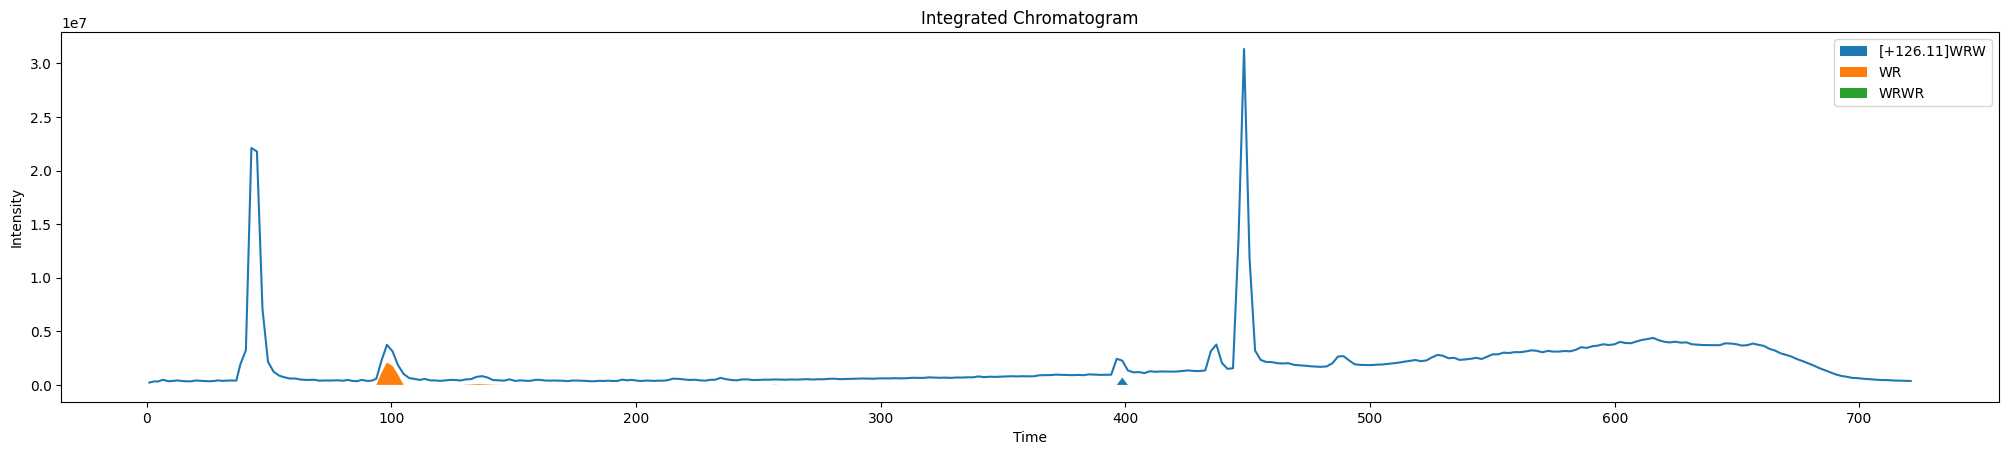

In [141]:
  
# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.mzXML'):
        file_path = os.path.join(directory, filename)
        print(f"Processing file: {file_path}")
        if os.path.exists(file_path):
            process_file(file_path)

            # Create the output file name
            output_file_name = f"{os.path.splitext(filename)[0]}_output.csv"
            
        else:
            print(f"File not found: {file_path}")